I'm not a big Twitter user, but I've heard the term "black twitter" come up in conversations. From what I gather, it's used to describe when black folks let our voices ring out on topics of interest to us. So I wanted to grab some twitter data and explore black twitter hashtags for myself to see what are the topics of conversation. Who is using this hashtag, and why? This notebook will dig into that.

In [2]:
from tweepy import OAuthHandler
import tweepy
import json
import pandas as pd
import csv
import string
import os
import time



You need to have Twitter credentials from a developer account in order to use the Twitter API

In [5]:
#Twitter credentials from developer account
consumer_key = "xxxxxxxxxxx"
consumer_secret = "xxxxxxxxxxxx"
access_token = "xxxxxxxxxxxxxxxxxx"
access_secret = "xxxxxxxxxxxxxxxxxxx"


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [21]:
#Test out how data looks when pulled and paramaters
#ading tweet_mode='extended' was essential to get the full text

for tweet in tweepy.Cursor(api.search,q="#blacktwitter or #BlackTwitter or #blackTwitter or #Blacktwitter",count=100,
                           lang="en",
                           tweet_mode='extended',
                           since="2019-01-03", include_rts=False).items():
    print (tweet.created_at, "\n", tweet.user.screen_name, "\n", tweet.user.location, "\n", tweet.entities['hashtags'],"\n", tweet.entities['urls'])
    try:
        print(tweet.retweeted_status.full_text, "\n-----------------------")
    except:  # Not a Retweet
        print("not a retweet")
        try:
            print(tweet.full_text, "\n-----------------------")
        except:
            print(tweet.text, "\n---------------------")


2020-05-03 22:14:56 
 iftikharsoomr0 
 Dubai, United Arab Emirates 
 [{'text': 'bluetweeter', 'indices': [121, 133]}, {'text': 'BlackTwitter', 'indices': [135, 148]}] 
 []
not a retweet
The most beautiful things in the world cannot be seen or even touched. They must be felt with heart ❤️ 

(Helen keller)

#bluetweeter 
#BlackTwitter https://t.co/C4qWekn3la 
-----------------------
2020-05-03 22:06:01 
 BlackPressRadio 
 Washington, DC in the USA 
 [{'text': 'BlackTwitter', 'indices': [246, 259]}, {'text': 'Tech4Covid', 'indices': [260, 271]}] 
 [{'url': 'https://t.co/TxCORto0bV', 'expanded_url': 'http://BlackWomenCEOS.com', 'display_url': 'BlackWomenCEOS.com', 'indices': [42, 65]}]
not a retweet
THIS IS MY 'WHY'!!! This is why I started https://t.co/TxCORto0bV and even am PERSONALLY hosting FOUNDERS FRIDAY so I can share tips with my young Black Women CEOs because we DON'T NEED THE BANKS OR VENTURE CAPITALISTS. They NEED us! - DC Livers #BlackTwitter #Tech4Covid https://t.co/nwfZy1M4qt

2020-05-03 08:52:59 
 RanaSuhaibPhoto 
 Islamabad 
 [{'text': 'BlackTwitter', 'indices': [64, 77]}] 
 []
not a retweet
Okay i don't have full black jet or heli.
Pak Army🇵🇰✌️ Bell 412
#BlackTwitter https://t.co/qeEwDp6FqR 
-----------------------
2020-05-03 08:17:39 
 SasTrendy 
  
 [{'text': 'Pennsylvania', 'indices': [0, 13]}, {'text': 'BlackTwitter', 'indices': [14, 27]}] 
 []
not a retweet
#Pennsylvania #BlackTwitter I think this is why they are keeping people in halfway house against their home plans for the next 2 weeks they can't go to work, I'm not sure if it's all or just a specific one here in Lackawanna county. Doesn't seem right! Can't get black people to.. https://t.co/NZhyLNTvov 
-----------------------
2020-05-03 07:49:22 
 Biggbos29775144 
  
 [{'text': 'BlueTwitter', 'indices': [60, 72]}, {'text': 'BlackTwitter', 'indices': [77, 90]}, {'text': 'AyezaKhan', 'indices': [107, 117]}, {'text': 'ArtiSingh', 'indices': [118, 128]}] 
 []
I don't care if it's there or not

Doing

2020-05-01 17:23:27 
 Darkbrowntwin 
 midwest 
 [] 
 []
Colorism at its finest. Rap battle or not talking about pimping out a black 6yr old girl is disgusting. We need to protect our children and women, this should not be the norm. A full 4 minutes of bullshit. #BlackTwitter https://t.co/7n9vYoaD8y 
-----------------------
2020-05-01 17:11:49 
 lmc_tech 
 Iowa 
 [{'text': 'BlackTwitter', 'indices': [244, 257]}, {'text': 'decisions', 'indices': [258, 268]}] 
 []
not a retweet
I'm officially registered to get my BA degree and can't decide on Graphic Design or Human Services. 

Design would help my Web Design business and Human Services would compliment my AS Degree and I could case manage remotely at times. Choices! #BlackTwitter #decisions 
-----------------------
2020-05-01 17:09:45 
 looseluddite 
 Montreal 
 [{'text': 'NativeTwitter', 'indices': [251, 265]}, {'text': 'BlackTwitter', 'indices': [266, 279]}] 
 [{'url': 'https://t.co/GkjJbAJSAz', 'expanded_url': 'https://twitter.com/Bre

2020-05-01 00:11:58 
 xaelbot 
 Earth 
 [{'text': 'BlackTwitter', 'indices': [123, 136]}] 
 [{'url': 'https://t.co/qIwOiGoV2O', 'expanded_url': 'http://cndro.com/sql', 'display_url': 'cndro.com/sql', 'indices': [75, 98]}]
Registration is still going on for our SQL live class. Visit https://t.co/qIwOiGoV2O for more details or DM.
#BlackTwitter #BlackTechTwitter #100DaysOfCode #CodeNewbie #data #codefromhome https://t.co/yYGfLqNFvC 
-----------------------
2020-05-01 00:11:52 
 LlcCndro 
 Houston, TX 
 [{'text': 'BlackTwitter', 'indices': [109, 122]}, {'text': 'BlackTechTwitter', 'indices': [123, 140]}, {'text': '100DaysOfCode', 'indices': [141, 155]}, {'text': 'CodeNewbie', 'indices': [156, 167]}, {'text': 'data', 'indices': [168, 173]}, {'text': 'codefromhome', 'indices': [174, 187]}] 
 [{'url': 'https://t.co/qIwOiGoV2O', 'expanded_url': 'http://cndro.com/sql', 'display_url': 'cndro.com/sql', 'indices': [61, 84]}]
not a retweet
Registration is still going on for our SQL live class. Vis

2020-04-30 19:37:22 
 finebrownthang 
  
 [{'text': 'BlackTwitter', 'indices': [13, 26]}] 
 []
#BlackTwitter am I trippin or..? 🤔 https://t.co/DH6yCS4GGn 
-----------------------
2020-04-30 19:34:45 
 monetaryplug 
 stealth 
 [{'text': 'BlackTwitter', 'indices': [250, 263]}, {'text': 'StayAtHome', 'indices': [264, 275]}] 
 []
not a retweet
QUARANTINE GAMES ™️

+ No Correct Answer is necessary 

+ Everyone is entitled to their own opinion but please challenge each other’s responses if you feel what they said was dumb, smart, or just questionable 

+ An Open Minded Game ™️ Comment Below #BlackTwitter #StayAtHome https://t.co/uJwTV1fE20 
-----------------------
2020-04-30 19:25:22 
 stefbeleri 
 dying  
 [] 
 []
Hey everyone!! I just officially published my lil shopify website! Yay! I would appreciate it so much if y’all supported my dreams of eventually self-publishing my poetry, by purchasing some of my pieces or rting❤️

Just a tiny black gal trying to become big 🙌🏾

#BlackTwitter http

2020-04-30 13:38:13 
 sierrajadep 
  
 [] 
 []
Hey everyone!! I just officially published my lil shopify website! Yay! I would appreciate it so much if y’all supported my dreams of eventually self-publishing my poetry, by purchasing some of my pieces or rting❤️

Just a tiny black gal trying to become big 🙌🏾

#BlackTwitter https://t.co/OZgSPHdFy1 
-----------------------
2020-04-30 12:50:42 
 noahtk7 
 Florida, USA 
 [] 
 []
Hey everyone!! I just officially published my lil shopify website! Yay! I would appreciate it so much if y’all supported my dreams of eventually self-publishing my poetry, by purchasing some of my pieces or rting❤️

Just a tiny black gal trying to become big 🙌🏾

#BlackTwitter https://t.co/OZgSPHdFy1 
-----------------------
2020-04-30 12:46:48 
 alntal 
 Washington, DC 
 [{'text': 'ICE', 'indices': [109, 113]}, {'text': 'BlackTwitter', 'indices': [247, 260]}] 
 [{'url': 'https://t.co/XB1fWxUCsl', 'expanded_url': 'https://www.cnn.com/2020/04/29/business/meat-processi

2020-04-29 00:00:44 
 FBA1619 
 United States 
 [{'text': 'BlackAmerican', 'indices': [11, 25]}, {'text': 'COVID19', 'indices': [42, 50]}, {'text': 'California', 'indices': [69, 80]}, {'text': 'Democrat', 'indices': [97, 106]}, {'text': 'BlackTwitter', 'indices': [187, 200]}, {'text': 'Liberalism', 'indices': [201, 212]}] 
 [{'url': 'https://t.co/7VqX3JAAdM', 'expanded_url': 'https://nypost.com/2020/04/23/dems-allegedly-working-to-send-checks-to-illegal-immigrants/', 'display_url': 'nypost.com/2020/04/23/dem…', 'indices': [214, 237]}]
not a retweet
If you are #BlackAmerican and not getting #COVID19 stimulus money in #California or any of these #Democrat cities act like you are a Illegal Aliens so you can get some money.. 🤷🏾‍♂️🤦🏾‍♂️ #BlackTwitter #Liberalism  https://t.co/7VqX3JAAdM 
-----------------------
2020-04-28 23:21:15 
 thatmanjustice 
 New Jersey, USA 
 [{'text': 'blacktwitter', 'indices': [92, 105]}, {'text': 'blacktwittermovement', 'indices': [106, 127]}] 
 [{'url': 'https:/

2020-04-28 00:58:00 
 BLKStreet_ 
  
 [{'text': 'socialmedia', 'indices': [14, 26]}, {'text': 'entrepreneur', 'indices': [59, 72]}, {'text': 'businessowner', 'indices': [76, 90]}, {'text': 'funding', 'indices': [105, 113]}, {'text': 'resources', 'indices': [114, 124]}, {'text': 'business', 'indices': [143, 152]}, {'text': 'COVID19', 'indices': [160, 168]}, {'text': 'coronavirus', 'indices': [198, 210]}, {'text': 'BlackTwitter', 'indices': [211, 224]}] 
 [{'url': 'https://t.co/udNC3BOL4f', 'expanded_url': 'http://www.blkstreet.com/covid/', 'display_url': 'blkstreet.com/covid/', 'indices': [173, 196]}]
not a retweet
We’re back on #socialmedia to make sure that if you are an #entrepreneur or #businessowner, you have the #funding #resources you need for your #business during #COVID19 - 

https://t.co/udNC3BOL4f

#coronavirus #BlackTwitter 
-----------------------
2020-04-28 00:45:22 
 BeingManas2 
 Orissa, India 
 [{'text': 'BlackTwitter', 'indices': [89, 102]}] 
 []
MASHALLAH our @BeingSa

2020-04-27 14:25:18 
 Aisha30597297 
  
 [{'text': 'BlackTwitter', 'indices': [42, 55]}, {'text': 'BlueTwitter', 'indices': [58, 70]}, {'text': 'SidharthShukla', 'indices': [74, 89]}] 
 []
It's black or blue ? 🤔🤔

#BlackTwitter 🖤 #BlueTwitter 💙

#SidharthShukla @sidharth_shukla https://t.co/gYd4h17zw5 
-----------------------
2020-04-27 14:20:04 
 munnachatterjee 
 WB, India 
 [{'text': 'BlackTwitter', 'indices': [0, 13]}, {'text': 'ProfilePic', 'indices': [18, 29]}] 
 []
not a retweet
#BlackTwitter 
or #ProfilePic or.... https://t.co/TvYChOpKfj 
-----------------------
2020-04-27 14:17:00 
 Priyank33726811 
 Canada 
 [{'text': 'BlackTwitter', 'indices': [42, 55]}, {'text': 'BlueTwitter', 'indices': [58, 70]}, {'text': 'SidharthShukla', 'indices': [74, 89]}] 
 []
It's black or blue ? 🤔🤔

#BlackTwitter 🖤 #BlueTwitter 💙

#SidharthShukla @sidharth_shukla https://t.co/gYd4h17zw5 
-----------------------
2020-04-27 14:04:21 
 DaveyRoshaan 
  
 [{'text': 'BlackTwitter', 'indices': [31, 44]},

2020-04-27 01:41:47 
 Retrospectss 
  
 [{'text': 'FollowTrain', 'indices': [25, 37]}, {'text': 'Emoji', 'indices': [67, 73]}, {'text': 'LIKE', 'indices': [75, 80]}, {'text': 'Follow', 'indices': [97, 104]}, {'text': 'FOLLOWBACK', 'indices': [106, 117]}] 
 []
💛🌻👸🏾#FollowTrain👸🏾🌻💛
-Drop a “👸🏾” or favorite #Emoji
-#LIKE who you want to #Follow
-#FOLLOWBACK WHO LIKES IT
-#RETWEET 
#BlackGirlMagic #BlackGirlsRock 
#BlackTwitter #followforfollow #BlackQueens #BlackWomen #Blackartists #blackbeauty #myblackisbeautiful #naturalhair 
-----------------------
2020-04-27 01:18:57 
 2hosandaconsole 
 Arizona, USA 
 [{'text': 'not2000srandb', 'indices': [105, 119]}, {'text': 'mylife', 'indices': [120, 127]}, {'text': 'BlackTwitter', 'indices': [128, 141]}, {'text': 'randb', 'indices': [142, 148]}, {'text': 'milk', 'indices': [149, 154]}] 
 []
not a retweet
Clearly my Pandora is experiencing some flu like symptoms. Either that or Kroger got milk back in stock. #not2000srandb #mylife #BlackTwitter #ra

In [407]:
#This code block will pull the pieces of tweet information that I want and store them in a dataframe.

def pull_tweets(mydate): #"yyyy-mm-dd"
    tweets_df = pd.DataFrame(columns = ['tw_id','date', 'user', 'location', 'hashtags', 'urls', 'text'] )

    # how many tweets to pull at a time
    pull_cadence = 2000 
    # keep track of how many tweets have been pulled
    cnter = 0 
    twt_cnt =0

    for i in list(range(1,30)): 
            print(i)
            tweets = tweepy.Cursor(api.search,q="#blacktwitter or #BlackTwitter or #blackTwitter or #Blacktwitter",
                                   count=pull_cadence,
                                   lang="en",
                                   tweet_mode='extended',
                                   since=mydate, include_rts=False).items()
            for tweet in tweets:

                tw_id = tweet.id
                date = tweet.created_at 
                user = tweet.user.screen_name
                location = tweet.user.location
                hashtags = tweet.entities['hashtags']
                urls = tweet.entities['urls']
                try:
                    text = tweet.retweeted_status.full_text
                except:  # Not a Retweet
                    #print("not a retweet")
                    try:
                        text = tweet.full_text
                    except:
                        text = tweet.text

                # Clean up some of the Fields
                hashtags = [t['text'] for t in hashtags ]

                # Save the results to a list and append to data frame
                tweet_lst = [tw_id, date, user, location, hashtags, urls, text]
                row1 = pd.Series(tweet_lst, index = tweets_df.columns)
                tweets_df = tweets_df.append(row1, ignore_index=True)

                # keep track of how many tweets have been pulled
                #cnter +=1
            twt_cnt = pull_cadence * i 
            print(twt_cnt)

            # wait 1minutes to continue pulling so twitter won't boot us out
            time.sleep(1*60)
            
    return(tweets_df)


In [408]:
tweets_df4 = pull_tweets("2020-05-03")


tweets_df = pull_tweets("2020-04-25")
tweets_df2 = pull_tweets("2020-05-04") # came back and pulled this a few days later after a major new event had occurred

#tweets_df2 ran for 5/4/20 to morning of 5/7/20
#tweets_df ran for 4/25/20 to morning of 5/3/20
#tweets_df4 ran for 5/3/20 to morning of 5/10/20

#tweets_df4.to_csv("BlackTwitter_Tweets_df4.csv")
#tweets_df.to_csv("BlackTwitter_Tweets_df.csv")
#tweets_df2.to_csv("BlackTwitter_Tweets_df2.csv")

1
2000
2
4000
3
6000
4
8000
5
10000
6
12000
7
14000
8
16000
9
18000
10
20000
11
22000
12
24000
13
26000
14
28000
15
30000
16
32000
17
34000
18
36000
19
38000
20
40000
21
42000
22
44000
23
46000
24
48000
25
50000
26
52000
27
54000
28
56000
29
58000


In [ ]:
print(len(tweets_df4))
print(len(tweets_df4.tw_id.unique()))
print(len(tweets_df4.text.unique()))
print(tweets_df4.date.min())
print(tweets_df4.date.max())
tweets_df4.head()

In [3]:
tweets_df = pd.read_csv("BlackTwitter_Tweets_df.csv")
tweets_df2 = pd.read_csv("BlackTwitter_Tweets_df2.csv")
tweets_df4 = pd.read_csv("BlackTwitter_Tweets_df4.csv")
print(len(tweets_df))
print(len(tweets_df2))
print(len(tweets_df4))

14944
5356
17643


In [8]:
tweets_df4.iloc[:,2:]

date             user         location  \
0      2020-05-10 01:24:34         LITzy933              NaN   
1      2020-05-10 01:23:10        afrogarm_  London, England   
2      2020-05-10 00:57:58       JV10883156              NaN   
3      2020-05-10 00:10:10  Allforthatgayn1              NaN   
4      2020-05-09 23:45:06       baitSpeech               UK   
...                    ...              ...              ...   
17638  2020-05-03 00:39:14          SBBExpo              NaN   
17639  2020-05-03 00:38:07     directornola      South Korea   
17640  2020-05-03 00:36:50         apkimble              NaN   
17641  2020-05-03 00:16:52  BlackParenting1  Los Angeles, CA   
17642  2020-05-03 00:01:48  BlackParenting1  Los Angeles, CA   

                                                hashtags  \
0                                                     []   
1                                       ['BlackTwitter']   
2                                       ['BlackTwitter']   
3                   ['tiktok', 'BlackTwitter', 'racist']   
4                              ['blackTwitter', 'hotep']   
...                                                  ...   
17638                ['BlackExcellence', 'BlackTwitter']   
17639  ['businesstwitter', 'facemasks', 'subscription...   
17640                ['BlackExcellence', 'BlackTwitter']   
17641  ['BlackExcellence', 'BlackTwitter', 'SupportBl...   
17642  ['BlackExcellence', 'BlackTwitter', 'SupportBl...   

                                                    urls  \
0                                                     []   
1                                                     []   
2                                                     []   
3                                                     []   
4                                                     []   
...                                                  ...   
17638  [{'url': 'https://t.co/flVtsy8ypd', 'expanded_...   
17639                                                 []   
17640  [{'url': 'https://t.co/flVtsy8ypd', 'expanded_...   
17641  [{'url': 'https://t.co/bgPaAAGQKm', 'expanded_...   
17642  [{'url': 'https://t.co/flVtsy8ypd', 'expanded_...   

                                                    text  
0      My name is Shadae and I’m a freelance model in...  
1      #BlackTwitter thank you for making sure I don’...  
2      #BlackTwitter thank you for making sure I don’...  
3      #tiktok #BlackTwitter #racist ATTENTION TWITTE...  
4      Is the same thing happening in your country #b...  
...                                                  ...  
17638  If Your Child Is In 1st or 2nd Grade, Read Thi...  
17639  Would you subscribe to a subscription service ...  
17640  If Your Child Is In 1st or 2nd Grade, Read Thi...  
17641  If Your Child Is In Pre-K or Kindergarten, Rea...  
17642  If Your Child Is In 1st or 2nd Grade, Read Thi...  

[17643 rows x 6 columns]

In [10]:
df = tweets_df.iloc[:,1:].append(tweets_df2.iloc[:,1:], ignore_index=True)
print(len(df))
df = df.append(tweets_df4.iloc[:,2:], ignore_index=True)
print(len(df))
print(df.date.min())
print(df.date.max())
df

20300
37943
2020-04-25 14:31:59
2020-05-10 02:35:42


date             user                        location  \
0      2020-05-04 00:42:36    cheema_noor29                        Pakistan   
1      2020-05-04 00:26:05    szadususufzai  غنی خان دے کلی#Islamia college   
2      2020-05-04 00:22:18   hassan_sayss__                Lahore, Pakistan   
3      2020-05-04 00:16:18         mnakkhan           🇵🇰#PTIMemberSince1999   
4      2020-05-04 00:09:44        sadidasss               Karachi, Pakistan   
...                    ...              ...                             ...   
37938  2020-05-03 00:39:14          SBBExpo                             NaN   
37939  2020-05-03 00:38:07     directornola                     South Korea   
37940  2020-05-03 00:36:50         apkimble                             NaN   
37941  2020-05-03 00:16:52  BlackParenting1                 Los Angeles, CA   
37942  2020-05-03 00:01:48  BlackParenting1                 Los Angeles, CA   

                                                hashtags  \
0                                       ['BlackTwitter']   
1                                       ['BlackTwitter']   
2                         ['BlackTwitter', 'RedTwitter']   
3                                                     []   
4                                       ['BlackTwitter']   
...                                                  ...   
37938                ['BlackExcellence', 'BlackTwitter']   
37939  ['businesstwitter', 'facemasks', 'subscription...   
37940                ['BlackExcellence', 'BlackTwitter']   
37941  ['BlackExcellence', 'BlackTwitter', 'SupportBl...   
37942  ['BlackExcellence', 'BlackTwitter', 'SupportBl...   

                                                    urls  \
0                                                     []   
1                                                     []   
2                                                     []   
3                                                     []   
4                                                     []   
...                                                  ...   
37938  [{'url': 'https://t.co/flVtsy8ypd', 'expanded_...   
37939                                                 []   
37940  [{'url': 'https://t.co/flVtsy8ypd', 'expanded_...   
37941  [{'url': 'https://t.co/bgPaAAGQKm', 'expanded_...   
37942  [{'url': 'https://t.co/flVtsy8ypd', 'expanded_...   

                                                    text  
0      "I have lived as plain Mr. Jinnah and I hope t...  
1      #BlackTwitter For there is no Black as beautif...  
2      Did someone say #BlackTwitter or maybe #RedTwi...  
3      I asked an old man: Which is more important. [...  
4      yes or no?\n #BlackTwitter https://t.co/8HiIqy...  
...                                                  ...  
37938  If Your Child Is In 1st or 2nd Grade, Read Thi...  
37939  Would you subscribe to a subscription service ...  
37940  If Your Child Is In 1st or 2nd Grade, Read Thi...  
37941  If Your Child Is In Pre-K or Kindergarten, Rea...  
37942  If Your Child Is In 1st or 2nd Grade, Read Thi...  

[37943 rows x 6 columns]

In [11]:
#use pd.options to display the full length of the text without truncating
pd.options.display.max_colwidth = 300
df.text[19920:]

19920    Count me in @KFCSA ... if Phillet was White or Indian, #BlackTwitter &amp; Political farts would be tearing SA down. Call a Black person a monkey or the K word &amp; you are vilified but it’s OK for Blacks to go around wanting death &amp; calling others monkeys &amp; we just over look this? http...
19921                                                                “At the foundation of civilization is the melanated mind,  just about everything you see around you was either inspired by, invented by, or originated by a Black man or woman." #BlackHistory #BlackTwitter #BlackNews https://t.co/Ehm7pumm56
19922                          🤔"Go Back To Africa"\nIF every African-bred person in the 🗺 did return to the continent (on the cavet that all non-POCS abandoned Africa) to establish or support all black nations, I wonder how long before the 1st World Race War would break out?\n#BlackTwitter #blackgaytwitter
19923                    See how that #DoubleStandard  works? #BlueLivesM

# <font color="orange"> Clean the data <font/>

In [12]:
import re

import gensim
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS

import nltk 
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import matplotlib.pyplot as plt
%matplotlib inline

Clean up the text

In [13]:
mylist = []
def clean_up_fun(data):
    
    for index, row in enumerate(data):

        ttext= str(row)
        #to lowercase
        ttext= ttext.lower()
        #remove numeric characters
        ttext = re.sub(r'\d*','', ttext)        
        
        #tokenize the data by whitespace
        tokens = nltk.tokenize.WhitespaceTokenizer().tokenize(ttext)
      
        #remove hashtag tokens (search tokens that start with hashtag)
        tokens = [t for t in tokens if not re.search('^#', t) ]
        #remove url tokens (search tokens that start with https)
        tokens = [t for t in tokens if not re.search('^https', t) ]
        #remove @ tokens (search tokens that start with @)
        tokens = [t for t in tokens if not re.search('^@', t) ]
        #remove periods, commas, exclamations
        #tokens = [re.sub("[\.,!:?/\[\]*]", '', t) for t in tokens]
        
        # join the tokens back into a string so when do non alphabet function can re-tokenize and get clean tokens
        ttext = " ".join(tokens)
        #remove all non-alphabet characters from string
        regex = re.compile('[^a-z]')
        ttext = regex.sub(' ', ttext)
        
        #tokenize the data by whitespace
        tokens = nltk.tokenize.WhitespaceTokenizer().tokenize(ttext)
        #get rid of amp
        tokens = [t for t in tokens if not t == "amp"]

        #lemmatize text**********

        def get_wordnet_pos(word):
            """Map POS tag to first character lemmatize() accepts"""
            tag = nltk.pos_tag([word])[0][1][0].upper()
            tag_dict = {"J": wordnet.ADJ,
                       "N" : wordnet.NOUN,
                       "V" : wordnet.VERB,
                       "R" : wordnet.ADV}
            return tag_dict.get(tag, wordnet.NOUN)
        try:
            tokens = [WordNetLemmatizer().lemmatize(word, get_wordnet_pos(word)) for word in tokens]
        except:
            print("no lemma")
        #*************

        #remove stop words and words less than 3 characters; right now I'm going to keep in stopwords
        #tokens = [w for w in tokens if len(w)>2]
        tokens = [w for w in tokens if not w in gensim.parsing.preprocessing.STOPWORDS and len(w) > 2]

        
        mylist.append([index, tokens])
        
    return(mylist)

mylist = clean_up_fun(df.text)

In [14]:
text_df = pd.DataFrame(mylist, columns= ["indx", "clean_text"])

In [15]:
#reunite the cleaned text with the other fields from the original data frame
text_df2 = pd.merge(df, text_df, left_index=True, right_on="indx").drop("indx", axis=1)

Once we have cleaned data in a frame, wanted to make sure I removed duplicates. The orginal data frame was 20300, but dropping duplicates in the text column resulted in just 509 remaining tweets.

Dropping duplicates on text and date resulted in 1011 remaining tweets.

I'm not that familiar with how twitter works, but in general is it just retweeting the same things? Or is the method of pulling in the tweets the reason that yielded so many duplicates? I'm not really sure, but proper methodology of pulling tweets is beyond the scope of this analysis. However, 500 tweets is not many to make a robust analysis.

In [188]:
print(len(text_df2))
text_df2 = text_df2.drop_duplicates(["text"])
print(len(text_df2))
text_df2.iloc[:,:6].tail(10)

611
611


date             user                   location  \
20597  2020-05-06     1naturalzeta                        NaN   
20598  2020-05-06   MissionaryBLMM  🇺🇸ConstitutionProtected💻🌏   
20605  2020-05-06  BlackPressRadio                        USA   
20739  2020-05-04    PanAfricology            South Africa 🇿🇦   
20792  2020-05-03          SkSteev   Toronto, Ontario, Canada   
20830  2020-05-03        Khosahere                   Pakistan   
20860  2020-05-03     Mrizkhan1987                   Pakistan   
20861  2020-05-03      Mrizkhan001                   Pakistan   
20874  2020-05-03    PanAfricology            South Africa 🇿🇦   
20889  2020-05-03  trinitywhite_14                        NaN   

                                                                                                                                                                                                              hashtags  \
20597                                                                                                                                                                                     ['LetitiaJames', 'DeBlasio']   
20598                                                                                                                                                                            ['End', 'BLMLawsuit', 'BlackTwitter']   
20605                                                                                  ['ArrestTheMayor', 'BillDeBlasio', 'NYCMayor', 'Homeless', 'homelesscantstayhome', 'HomelessFraud', 'NYCMayor', 'BlackTwitter']   
20739  ['Chinese', 'China', 'ChinaLiedPeopleDied', 'WHO', 'lockdown', 'ChinaMustPay', 'Africansinchina', 'BritishAmericanTobacco', 'VaalTwitter', 'sabcnews', 'day39oflockdown', 'Vaal', 'BlackChina', 'BlackTwitter']   
20792                                                                                                                                                                                                 ['BlackTwitter']   
20830                                                                                                                                                                                                 ['BlackTwitter']   
20860                                                                                                                                                                                                 ['BlackTwitter']   
20861                                                                                                                                                                                                 ['BlackTwitter']   
20874                                                                                                             ['Chinese', 'China', 'Nigerians', 'SouthAfricans', 'ProfLumumba', 'AfricansInChina', 'BlackTwitter']   
20889                                                                                                                                                         ['BlackTwitter', 'BlackLivesMatter', 'racism', 'racist']   

      urls  \
20597   []   
20598   []   
20605   []   
20739   []   
20792   []   
20830   []   
20860   []   
20861   []   
20874   []   
20889   []   

                                                                                                                                                                                                                                                                                                              text  
20597  BREAKING NEWS: NY State Atty Gen #LetitiaJames MUST ARREST #DeBlasio or be recalled from her position. It's her job to ARREST THE MAYOR! If she doesn't she can be RECALLED. They intentionally kept NY open and it's causing the entire country to suffer. #BlackTwitter @NYCCouncil https://t.co/BbsgM...  
20598  @SpeakerPelosi #End BlackLivesMatter© Copyright Infringement\n#BLMLawsuit\n#BlackTwitter @NBA @NFL @MLB\nIF YOU GAVE💰T

Clean up locations. Upon first glance at the data, it looks like US, India, and Pakistan may be dominant locations so let's try to normalize the text for these to get better counts down the line

In [25]:
# check if a location ends with any of these strings. if so normalize it.
text_df2["location"] = [ "India" if re.search('india$', str(i).lower().strip()) else i for i in text_df2.location ]
text_df2["location"] = [ "Pakistan" if re.search('pakistan$', str(i).lower().strip()) else i for i in text_df2.location ]
text_df2["location"] = [ "USA" if re.search('usa$', str(i).lower().strip()) else i for i in text_df2.location ]
text_df2["location"] = [ "USA" if re.search('united states$', str(i).lower().strip()) else i for i in text_df2.location ]

In [18]:
text_df2.dtypes

date          object
user          object
location      object
hashtags      object
urls          object
text          object
clean_text    object
dtype: object

In [27]:
from datetime import datetime

In [37]:
text_df2["date"] = pd.to_datetime(text_df2.date)

## <font color ="blue"> Explore Data <font/>

Let's see how many tweets per day. Remove the timestamp from the date column

In [38]:
text_df2["date"] = text_df2["date"].dt.date

/anaconda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


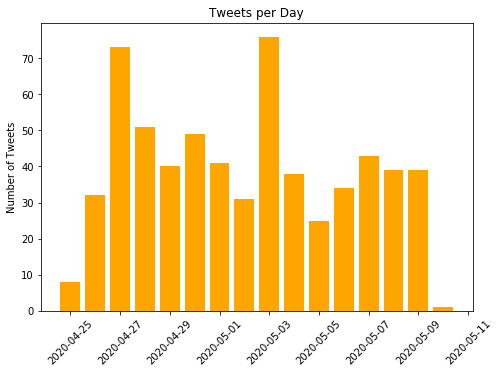

In [39]:
cnt = text_df2["date"].value_counts()
cnt.values

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cnt.index,cnt.values, color="orange")
ax.set_ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.title("Tweets per Day")
plt.show()

Look at word frequencies. Below we join the tokens in each row as a string into a list. Then we collapse the list into one big string. That way we can check out most frequent words and most frequent bigrams

In [41]:
#text needs to be in one big string to do ngrams
bigstring = " ".join([" ".join(i) for i in text_df2.clean_text ])

In [42]:
from nltk.util import ngrams
 
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
 

In [43]:
bgrams = extract_ngrams(bigstring,2)
freqBgrams = nltk.FreqDist(bgrams)
topBgrams = freqBgrams.most_common(20)

In [44]:
topBgrams

[('black people', 33),
 ('naughty nice', 11),
 ('nice spank', 11),
 ('spank spank', 11),
 ('black woman', 10),
 ('child grade', 10),
 ('grade read', 10),
 ('child pre', 10),
 ('pre kindergarten', 10),
 ('kindergarten read', 10),
 ('read right', 10),
 ('social distance', 10),
 ('black twitter', 9),
 ('black man', 9),
 ('wan na', 7),
 ('williams chicken', 7),
 ('american problem', 7),
 ('demand justice', 7),
 ('african american', 6),
 ('social medium', 6)]

In [45]:
Onegrams = extract_ngrams(bigstring,1)
freqOnegrams = nltk.FreqDist(Onegrams)
topOnegrams = freqOnegrams.most_common(20)
topOnegrams

[('black', 216),
 ('people', 101),
 ('white', 73),
 ('like', 70),
 ('time', 38),
 ('know', 37),
 ('need', 35),
 ('child', 35),
 ('want', 35),
 ('let', 31),
 ('love', 30),
 ('twitter', 29),
 ('think', 29),
 ('look', 28),
 ('thing', 28),
 ('right', 26),
 ('start', 26),
 ('woman', 26),
 ('man', 25),
 ('feel', 25)]

In [71]:
#What are the most frequent hashtags?
#one big string of hashtags
bighash = " ".join([re.sub("[-_\.,!:?/\[\]*']","", i).lower() for i in text_df2.hashtags ])

Onegrams = extract_ngrams(bighash,1)
freqOnegrams = nltk.FreqDist(Onegrams)
topOnegrams = freqOnegrams.most_common(30)
topOnegrams

[('blacktwitter', 528),
 ('blackexcellence', 36),
 ('covid19', 24),
 ('blacklivesmatter', 22),
 ('bluetwitter', 12),
 ('blackaf', 10),
 ('black', 10),
 ('ahmaudarbery', 10),
 ('whiteprivilege', 9),
 ('ados', 9),
 ('supportblackbusiness', 8),
 ('racism', 8),
 ('blackpeople', 7),
 ('justiceforahmaudarbery', 7),
 ('blackgirlmagic', 6),
 ('uk', 6),
 ('france', 6),
 ('germany', 6),
 ('australia', 6),
 ('canada', 6),
 ('stayhome', 6),
 ('blackwomen', 6),
 ('racist', 6),
 ('arrestthemnow', 6),
 ('arrestthemallnow', 6),
 ('redtwitter', 5),
 ('covidー19', 5),
 ('whitesupremacy', 5),
 ('blm', 5),
 ('covid', 5)]

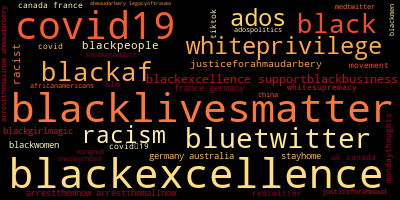

In [73]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
#long_string = " ".join([" ".join(i) for i in text_df2.clean_text ])
# Create a WordCloud object
bighash1 = re.sub('blacktwitter','', bighash).strip()
#regex.sub(' ', ttext)
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, colormap='YlOrRd')
# Generate a word cloud
wordcloud.generate(bighash1)
# Visualize the word cloud
wordcloud.to_image()

Where around the world are the tweets coming from?

In [74]:
[print(idx, i) for idx,i in zip(text_df2.location.value_counts().index, text_df2.location.value_counts())]

USA 51
Pakistan 22
India 21
Global 15
Los Angeles, CA 9
southeastern michigan 6
Worldwide  6
Your girl house on y'all bed  6
Chicago, IL 5
Brooklyn, NY 4
New York, NY 4
Boundless 4
Atlanta, GA 4
South Africa 3
England, United Kingdom 3
Dallas, TX 3
London, England 3
NYC 3
South Africa 🇿🇦 3
Washington, DC 3
Manhattan, NY 3
Self Love via Self Awareness 3
Nigeria 3
Baltimore, MD 3
CA 3
Centurion, South Africa 2
Seattle, WA 2
mars 🍕⚽️🌈  2
New York 2
Kansas City, MO 2
Philadelphia, PA 2
🙏मातृभूमि/ भारत🙏 USA. 2
east905 Toronto 2
Canada 2
Ontario, Canada 2
Dubai, United Arab Emirates 2
OHIO 2
Minneapolis, MN 2
Everywhere 2
Everywhere Online 2
Manhattan 10040 2
Birmingham, England 2
Nashville, TN 2
New Orleans, LA 2
 420 2
ʲᵘⁿᵍʷᵒᵒˢ ᵇʳᵃⁱⁿ 2
Fort Llatikcuf AZ. I shit MAGA-turds even more than Donut Twitter donut holes. #StillWithHer McKinney 08/Stein 12/Stein 16 2
Portland, Oregon 2
Las Vegas, NV 2
In My Black Skin & Breathing! 2
Cape Town, South Africa 2
Chicago 2
Toronto, Ontario, Canada 1
کرا

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [77]:
cnt = text_df2["location"].value_counts()
cnt.values

#fig = plt.figure()
ax = plt.subplots(figsize=(20,5))
# the 1: is to get rid of the first observation, which has a high count for an empty label
# and only plotting the top third
plt.bar(cnt.index[1:round(len(cnt)/3)], cnt.values[1:round(len(cnt)/3)], color="green") 
plt.ylabel("Number of Tweets")
plt.xticks(rotation=75, size = 8)
plt.title("Number of Tweets by Location (Top third)")
plt.show()

Above we can see that the tweets are coming from a variety of places, across the US and around the world. Outside of the US, there seemed to be a good amount of tweets from India and Pakistan. I wonder why they would be using that hashtag.

In [78]:
text_df2[text_df2["location"] == "Pakistan"]
# looking at some of the Pakistan tweets, they're all over the place, from fashion to quotes of people, and self help to nonsensical
text_df2[text_df2["location"] == "India"]
#India also looks like it deals with clothes, but seems to have some awareness that this hashtag may be meant for a movement of black people

date             user location  \
308    2020-04-30           rhtmjn    India   
352    2020-04-29         Gautam25    India   
353    2020-04-29  SouravS73745058    India   
360    2020-04-29  Himansh21294150    India   
391    2020-04-28    JeetOffIcial6    India   
446    2020-04-28  barelyxhumorous    India   
535    2020-04-27  thasaphotograph    India   
556    2020-04-27         RS_dilli    India   
576    2020-04-27     rituraj_prht    India   
583    2020-04-27  munnachatterjee    India   
595    2020-04-27         GENEABHI    India   
638    2020-04-27     poornima2oct    India   
639    2020-04-27     priyalpoddar    India   
642    2020-04-27      BJoshibeena    India   
649    2020-04-27   MuthuRangasamy    India   
663    2020-04-27      itsmeAnu183    India   
665    2020-04-27     sakshii_jain    India   
675    2020-04-27     RahulSingh_I    India   
678    2020-04-27        facts2507    India   
680    2020-04-27    Bantish_bunny    India   
20433  2020-05-08       kaizad3770    India   

                                                                                                                                                                hashtags  \
308                                                                                                                                                     ['BlackTwitter']   
352                                                                                                                                          ['Twitter', 'BlackTwitter']   
353                                            ['IrrfanKhan', 'IrfanKhan', 'RIPIrrfanKhan', 'Legend', 'lunchbox', 'BlackTwitter', 'RIPLegend', 'Bollywood', 'RIPLegend']   
360                                                                                                                                      ['BlueTwitter', 'BlackTwitter']   
391                                                                                                                                       ['RedTwitter', 'BlackTwitter']   
446                                                                                                                                      ['bluetwitter', 'blacktwitter']   
535                                                                                                                                                                   []   
556                                                                                                                             ['BlackTwitter', 'CagedBeautyWhatAPity']   
576                                                                                                                                                     ['BlackTwitter']   
583                                                                                                                                       ['BlackTwitter', 'ProfilePic']   
595                                                                                                                                                     ['BlackTwitter']   
638                                                                                                                                                     ['BlackTwitter']   
639                                                                                                                                    ['blacktwitter', 'yellowtwitter']   
642                                                                                                           ['black', 'BlackTwitter', 'goodmorning', 'mondaythoughts']   
649                                                                                                                                                                   []   
663                                                                                                                                                     ['BlackTwitter']   
665                                                   

## <font color="red"> Getting an Idea of Overall Topics <font/>

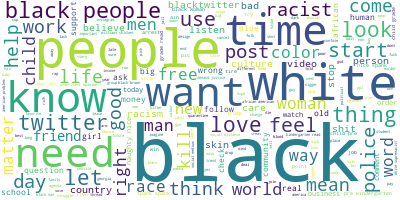

In [79]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = " ".join([" ".join(i) for i in text_df2.clean_text ])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

topic modelling may be inappropriate because of lack of data. Maybe we use tf-idf to get important words and embeddings to bring context to them. but is this data too small for embeddings as well. And what about just plain old clustering

## Embeddings

In [84]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [85]:

# train model
model = Word2Vec(text_df2.clean_text, min_count=1, size = 10, sg=1) #sg=1 is for skipgram, 0 is for CBOW

In [86]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig = pyplot.figure( figsize=(18, 11))

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


## Hierarchical Clustering

In [93]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import TfidfVectorizer


In [91]:
# for each sentence (in our case work order text), from the set of sentences, word embeddings of each word is summed
# an in the end divided by the number of words in the sentence
# This is to get the average of all word embeddings in a sentence, so that we can have vector representations of the sentence
# that we can then use in our next algorithm

def sent_vectorizer(sent, model):
    sent_vec = []
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw += 1
        except:
            pass
   
    return np.asarray(sent_vec) / numw


In [122]:
sent_embeddings = []
embedding_df = pd.DataFrame()
#for i in list(range(len(trade_lst))):
   
#for each work order, vectorize the sentences and if the vector isn't empty, add to s_embed list
s_embed = []
for sentence in list(text_df2["clean_text"]):
    s_vec = sent_vectorizer(sentence, model)
    if len(s_vec != 0):
        s_embed.append(s_vec)
    else:
        s_embed.append("NA")
   # once have run through every work order in a trade, add vectors for that trade to sent_embeddings list
##sent_embeddings.append(s_embed)
#embed_d = pd.merge(corpus_df[corpus_df["wo_trade_name"] == trade_lst[i]].reset_index().drop('index', axis=1),
 #                    pd.DataFrame(s_embed), left_index=True, right_index=True).dropna().reset_index(drop=True)
#embedding_df = embedding_df.append(embed_d)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [131]:
#add the embeddings to data frame so can cohesively deal with tweets that don't have embeddings
text_df2["embeddings"] = s_embed
# remove the rows that have an NA for embeddings
text_df2 = text_df2[text_df2["embeddings"] != "NA"]

In [139]:
print(len(list(text_df2["clean_text"])))
print(len(s_embed))
list(text_df2["embeddings"])

611
620


[array([ 0.01517817, -0.01057257,  0.0079196 ,  0.01833173,  0.00771539,
         0.01530175,  0.01186292, -0.00022983,  0.01345513, -0.00234156],
       dtype=float32),
 array([ 0.01016922, -0.00093052, -0.02539727,  0.01901639,  0.02482907,
         0.01210195,  0.00745304, -0.00546444,  0.03222998, -0.00316815],
       dtype=float32),
 array([ 0.03717554, -0.04459179,  0.00093786,  0.01241294,  0.02789574,
         0.04151504, -0.02691048,  0.02826664,  0.01596846,  0.02191466],
       dtype=float32),
 array([ 0.02453011, -0.02687245, -0.05033322,  0.04214034,  0.06631628,
         0.01493156,  0.04316994, -0.02746585,  0.07341345, -0.01471106],
       dtype=float32),
 array([ 0.03443517,  0.01651835, -0.00996395,  0.05377489, -0.03238066,
        -0.01793316, -0.03678505,  0.02996544,  0.04467662,  0.04540978],
       dtype=float32),
 array([ 0.03574994, -0.0049494 , -0.02170825,  0.03368957,  0.06321623,
         0.00491108,  0.01446106, -0.00830363,  0.07369742, -0.01314476],
   

In [140]:
# join the sentence embeddings with their problem desc and then remove rows with 0 length array
# then reset indexes so this will be in sync with the array that will feed into cluster model
X = list(text_df2["embeddings"])
X1 = X
print(len(X))
print(len(X1))
#The way these vectors are stored is that there is a list with 17 instances -- one for each of the trades,
#and within that list there is an array for each work order kept from that trade

611
611


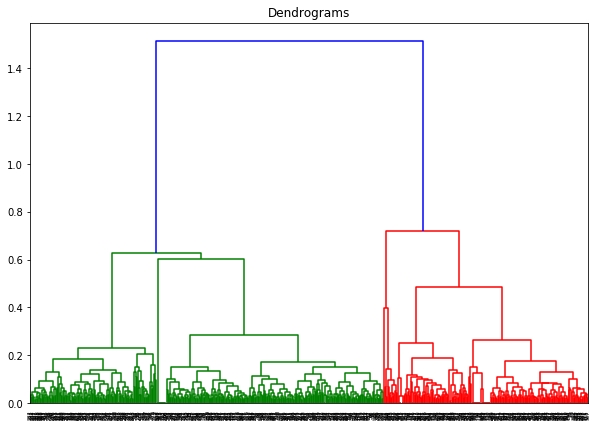

In [141]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X1, method='ward'))

In [174]:
n_clus = 4
cluster = AgglomerativeClustering(n_clusters=n_clus, affinity='euclidean', linkage='ward')
hclus = cluster.fit_predict(X1)

In [175]:
hclus_df = []
for idx, pred in enumerate(hclus):
    hclus_df.append((idx, pred))
hclus_df = pd.DataFrame(hclus_df, columns = ['ind', 'cluster']).drop('ind', axis=1)



In [176]:
print(len(hclus_df))
print(len(text_df2))


611
611


In [177]:
hclus_rslt_df = pd.merge(hclus_df, text_df2, right_index=True, left_index=True)

In [178]:
#how many observations went to each cluster
hclus_rslt_df.cluster.value_counts()

0    127
1    106
3     77
2      5
Name: cluster, dtype: int64

In [180]:
#Get top weighted words from tf-idf for each cluster
for cl in hclus_rslt_df.cluster.value_counts().index:
   
    #print(hclus_rslt_df.wo_trade_name.unique())
    print(cl)
   
    tk_lst = hclus_rslt_df[hclus_rslt_df["cluster"] == cl]
    #each work order needs to be a string, not a list of tokens
    string = [" ".join(x) for x in tk_lst["clean_text"]]

    #from sklearn.feature_extraction.text import TfidfVectorizer
    tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english', ngram_range = (1,1))
    tvec_weights = tvec.fit_transform(string)

    weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist() #this gives the average weight of each word over all documents
    weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
    topterm_weights = weights_df.sort_values(by='weight', ascending=False).head(30)
    print(topterm_weights)

0
         term    weight
459      like  0.018716
864     white  0.018174
839       use  0.016520
470      look  0.015500
531      need  0.014598
851      want  0.014102
121      care  0.012572
474      love  0.012198
143     child  0.011953
157     color  0.011327
866  williams  0.011114
825   twitter  0.010849
100     brand  0.010745
439      know  0.010532
793     thing  0.010513
501       men  0.010483
814   trippin  0.010464
333      good  0.010168
32   american  0.010041
870     woman  0.009841
815      true  0.009729
141   chicken  0.009710
24        ain  0.009299
798      time  0.009192
310    friend  0.009051
774      sure  0.009050
56        ask  0.009008
813     trend  0.008845
421      jail  0.008766
550   opinion  0.008753
1
             term    weight
102         child  0.030225
547          read  0.028286
636         spank  0.023306
732          want  0.022982
578         right  0.021645
517          post  0.020661
292         grade  0.018368
451          need  0.018144


ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [181]:
#Get top 20 most frequent words for each cluster
for cl in hclus_rslt_df.cluster.value_counts().index:
   
    #print(hclus_rslt_df.wo_trade_name.unique())
    print(cl)
   
    tk_lst = hclus_rslt_df[hclus_rslt_df["cluster"] == cl]
    #each work order needs to be a string, not a list of tokens
    lst = [" ".join(x) for x in tk_lst["clean_text"]]
    #[nltk.word_tokenize(z1) for z1 in z]
    tks = nltk.word_tokenize(" ".join(lst))
    fdist = nltk.FreqDist(tks)
    for word, frequency in fdist.most_common(20):
        print(u'{};{}'.format(word, frequency))

0
black;37
people;15
white;11
like;10
use;9
want;9
look;7
care;7
love;6
color;6
thing;6
know;6
men;6
need;6
american;6
williams;6
good;5
help;5
child;5
design;5
1
black;36
like;20
people;19
want;11
post;10
right;9
child;9
man;8
old;7
thing;7
time;7
need;7
love;6
read;6
life;6
matter;6
think;6
look;6
today;6
spank;6
3
black;23
people;10
white;10
like;9
start;8
know;8
twitter;8
feel;6
think;6
kaaba;5
need;5
child;5
free;5
soon;4
culture;4
right;4
let;4
video;4
thing;4
wrong;4
2
mean;4
black;3
nigger;3
blue;2
collar;2
game;2
day;2
shot;1
people;1
video;1
like;1
imformation;1
worker;1
input;1
cause;1
great;1
men;1
know;1
couldn;1
read;1
